Anna Mándoki, 31<sup>st</sup> July 2023

# Certified B Corporations - July 2023 update

## Summary

As a follow-up to the original notebook, the purpose of this analysis is to explore the Certified B Corporations dataset after the 1H 2023 update by B Lab.

- Examine changes compared to the previous version
- Evaluate data quality
- Perform data cleaning
- Analyse the dataset from a different point of view

Python libraries to be used: 
- NumPy
- pandas
- matplotlib
- seaborn

## About Certified B Corporations

B = beneficial

**Certified B Corporations are companies that meet the highest standards of verified social and environmental performance, transparency and accountability.**

The B Corp certification is a private certification issued by non-profit organization B Lab, that measures a company's social and environmental impact. In order to achieve the certification, a company must reach a total score of 80 or above on the B Impact Assessment. The assessment consists of around 200 questions about the company's practices and outputs across five categories: governance, workers, community, environment, and customers.

As of July 2023, there are more than 6,600 Certified B Corps located all around the world and across various industries.

For further information on the certification, see [Project Description and Notes](https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md)

## About the data

The data is owned by B Lab and was created using the companies' results on the B Impact Assessment. The participating companies agree to make the information about their performance measured against B Lab’s standards publicly available on their B Corp profile on B Lab’s website.

The raw data is made available by B Lab on *data.world*. The dataset is called *B Corp Impact data* and it can be downloaded in .csv format or can be used to run queries on using data.world's built-in query tool. I used the query I created and saved last time in order to read the data directly from data.world.

The dataset was last updated on the 30<sup>th</sup> June 2023. B Lab update the data on a quarterly basis. In the previous notebook I used the version of 31<sup>th</sup> March.

The dataset contains information on company characteristics (name, ID, country where it operates), certification dates, scores etc. The full data dictionary can be found in the  [Project Description and Notes](https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md)

### My query on data.world

I used the below query to narrow down the original dataset by excluding de-certified companies and values I don't intend to use in this project.

```sql
SELECT company_id, company_name, date_first_certified, date_certified, industry, industry_category,
    country, state, city, sector, size, overall_score, 
    impact_area_community, impact_area_customers, impact_area_environment, impact_area_governance,
    impact_area_workers, impact_area_community_na_score, impact_area_customers_na_score,
    impact_area_environment_na_score, impact_area_governance_na_score, impact_area_workers_na_score
FROM b_corp_impact_data
WHERE current_status = 'certified'
AND certification_cycle = 1
```

## Import the necessary libraries and read the dataset

### Importing libraries

In [1]:
from datetime import date, datetime # to parse dates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.edgecolor": "grey"}
sns.set_theme(style = "ticks", rc = custom_params) # to customize plots
pd.set_option("max_columns", 50) # to be able to see all the columns

### Read query result from *data.world*

In [2]:
bcorp_df = pd.read_csv("https://query.data.world/s/egdncyifkugdfjldtrctnorkucpqy4?dws=00000", parse_dates = ["date_first_certified", "date_certified"])

## Exploratory Data Analysis (EDA)

### Intentions for this section

See how the dataset changed compared to the previous version.
- Size: more rows added, meaning newly certified companies have been added.
- Missing data: missing city and state added?
- Companies with overall score below 80 removed?

### First look at the data

In [3]:
# number of columns and rows
bcorp_df.shape

(6657, 22)

In [4]:
# column names, dtypes, hint on null values
bcorp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6657 entries, 0 to 6656
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   company_id                        6657 non-null   object             
 1   company_name                      6657 non-null   object             
 2   date_first_certified              6657 non-null   datetime64[ns]     
 3   date_certified                    6657 non-null   datetime64[ns, UTC]
 4   industry                          6657 non-null   object             
 5   industry_category                 6657 non-null   object             
 6   country                           6657 non-null   object             
 7   state                             6654 non-null   object             
 8   city                              6657 non-null   object             
 9   sector                            6657 non-null   object       

In [5]:
# get the first 5 rows
bcorp_df.head()

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
0,0013b00001zWk0BAAS,PAD studio Ltd,2023-01-16,2023-01-16 13:07:41.005000+00:00,Architecture design & planning,"Real estate, design & building",United Kingdom,Hampshire,Lymington,Service with Minor Environmental Footprint,1-9,88.4,14.4,4.0,27.0,17.0,23.7,0.0,0.0,0.0,0.0,2.1
1,001C000001cjG1nIAE,B1G1,2017-10-11,2021-05-27 04:07:25.168000+00:00,Membership organizations,Other services,Singapore,Singapore,Singapore,Service with Minor Environmental Footprint,1-9,88.3,23.5,20.6,2.8,14.1,19.4,3.3,0.0,0.2,0.0,3.9
2,0013b00001p3n7tAAA,RPM,2021-02-08,2021-02-08 03:35:47.601000+00:00,Advertising & market research,Professional & technical services,United Kingdom,London,London,Service with Minor Environmental Footprint,50-249,84.6,16.6,1.9,7.2,18.4,35.0,1.7,0.0,0.5,0.0,2.9
3,001C000001fH72gIAC,Kingsfleet,2022-05-18,2022-05-18 14:13:36.866000+00:00,Investment advising,Financial & insurance activities,United Kingdom,Suffolk,Claydon,Service with Minor Environmental Footprint,1-9,91.8,16.3,26.0,6.8,12.9,25.9,0.9,0.4,0.5,0.0,1.4
4,001C000001iBax0IAC,"Danone Waters of America, Inc.",2019-06-10,2019-06-10 00:00:00+00:00,Beverages,Wholesale,United States,New York,White Plains,Wholesale/Retail,50-249,81.7,17.2,NaN,21.4,16.9,23.5,0.3,NaN,0.0,0.0,2.2


In [6]:
# get a random sample of 5 rows
bcorp_df.sample(5)

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
369,0013b00001p26umAAA,Bobelo,2022-08-30,2022-08-30 03:56:28.786000+00:00,Beverages,Manufactured Goods,United States,Utah,Sandy,Manufacturing,1-9,109.8,39.7,4.8,18.4,17.3,22.1,2.4,0.0,3.0,0.0,1.9
1727,0013b00001rGSzLAAW,Vivero San Nicolas,2021-09-24,2021-09-24 19:44:09.568000+00:00,Plant propogation,"Agriculture, forestry & fishing",Argentina,Mendoza,JUNIN,Agriculture/Growers,10-49,85.5,9.1,2.4,30.3,13.1,18.7,4.1,0.0,5.5,0.0,1.9
4693,0013b00001uPg5nAAC,Mine,2023-02-07,2023-02-07 16:27:03.731000+00:00,Advertising & market research,Professional & technical services,Italy,Lazio,Roma,Service with Minor Environmental Footprint,1-9,84.5,13.7,3.9,13.8,20.7,23.7,2.2,0.0,0.0,0.0,6.3
4480,0013b00001p3QBrAAM,SXOLLIE,2022-01-15,2022-01-15 01:46:01.972000+00:00,Beverages,Wholesale,United Kingdom,London Borough of Ealing,London,Wholesale/Retail,1-9,92.7,25.4,4.0,24.0,16.1,19.7,0.0,0.0,1.6,0.0,1.6
4071,001C000001C1tdjIAB,Raining Rose Inc.,2016-02-18,2023-06-13 22:52:46.981000+00:00,Personal care products,Manufactured Goods,United States,Iowa,Cedar Rapids,Manufacturing,250-999,80.4,22.7,4.0,16.6,16.1,19.9,0.0,0.0,0.6,0.0,0.2


### Observations after first look
- The data frame consists of 6657 rows ( = 6657 companies) and 22 columns (chosen by me). The previous version contained 6130 rows (=6130 companies) and 22 columns.
- There are still NaN values in columns related to customers and workers scores, but this is normal.
- No missing city anymore.

### TODO
- Look into the missing state
- Rename 'date_certified' column
- Create company count and year certified columns

## Data cleaning and transformation

### Intentions for this section

- Check missing values
- Check duplicates
- Check outliers in scores
- Rename 'date_certified' column
- Create year first certified column
- Decide if there are any rows that should be removed

### Missing values

In [7]:
# summarizing missing values
bcorp_df.isna().sum()

company_id                            0
company_name                          0
date_first_certified                  0
date_certified                        0
industry                              0
industry_category                     0
country                               0
state                                 3
city                                  0
sector                                0
size                                  0
overall_score                         0
impact_area_community                 0
impact_area_customers               112
impact_area_environment               0
impact_area_governance                0
impact_area_workers                 574
impact_area_community_na_score        0
impact_area_customers_na_score      112
impact_area_environment_na_score      0
impact_area_governance_na_score       0
impact_area_workers_na_score        574
dtype: int64

Columns with missing values:
- state: 3
- no city missing (there were 2 in the previous version)
- impact_area_customers: 112
- impact_area_workers: 574
- impact_area_customers_na_score: 112
- impact_area_workers_na_score: 574

#### Missing state

In [8]:
# see rows with missing state
bcorp_df[bcorp_df.state.isna()]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
897,001C000001lPVDdIAO,The Co-operative Bank,2021-01-13,2021-01-13 01:36:11.733000+00:00,Deposit bank - Developed Markets,Financial & insurance activities,New Zealand,NaN,Wellington,Service with Minor Environmental Footprint,250-999,88.1,14.3,14.6,8.2,15.5,28.0,2.1,0.8,0.0,0.0,3.7
1486,0013b00001rI2DxAAK,Future Kind,2021-03-29,2021-03-29 14:13:09.211000+00:00,Pharmaceutical products,Retail,Hong Kong S.A.R.,NaN,Hong Kong,Wholesale/Retail,1-9,86.1,11.7,5.0,17.0,17.9,20.7,2.5,0.0,6.4,0.0,4.6
3440,001C000001njcm9IAA,Octopus Group,2021-02-09,2021-02-01 00:00:00+00:00,Equity investing - Developed Markets,Financial & insurance activities,United Kingdom,NaN,London,Service with Minor Environmental Footprint,250-999,85.4,10.8,23.1,13.5,11.5,26.4,0.4,0.0,2.9,0.0,1.7


Missing state is only relevant for US companies. No need to add missing state for New Zealand, Hong Kong and UK.

#### Missing workers and customers score

Having NaN values in score columns related to customers and workers indicates that the questions related to these impact areas did not apply due to a company's special circumstences.
For example, when company size = 0, the company has no employees, therefor the workers impact score is irrelevant.
I leave them as they are, because NaN in these cases actually mean "not applicable", not "missing".

### Duplicates

In [9]:
# duplicated function returns bool --> sum to see how many duplicates we have
bcorp_df.duplicated().sum()

0

In [10]:
# locate duplicates if any in company_id column
bcorp_df[bcorp_df.company_id.duplicated()]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score


The 'company_id' is a unique identifier of companies in the dataset. If there are no duplicates among the IDs, we can be sure there are no duplicated (completely identical) rows.

I ensured this already in the query, but wanted to double-check.

### Outliers in scores

In [11]:
# check statistics for all score types
bcorp_df.describe()

,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
count,6657.000000,6657.000000,6545.000000,6657.000000,6657.000000,6083.000000,6657.000000,6545.000000,6657.000000,6657.000000,6083.000000
mean,95.022653,23.260958,11.475737,16.167778,15.479961,24.094263,2.080006,0.067823,1.603049,0.000571,3.044468
std,14.595891,12.029731,12.987431,12.012928,3.539067,8.147901,1.473181,0.279490,2.436601,0.015001,2.312848
min,78.200000,1.500000,0.000000,0.000000,4.000000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,84.100000,15.600000,3.000000,6.800000,13.900000,18.900000,0.900000,0.000000,0.000000,0.000000,1.000000
50%,90.800000,19.500000,4.400000,11.800000,15.800000,23.300000,2.200000,0.000000,0.600000,0.000000,2.800000
75%,101.400000,26.900000,17.400000,23.900000,17.700000,28.200000,3.000000,0.000000,2.200000,0.000000,4.700000
max,206.700000,115.200000,93.000000,90.800000,25.000000,89.000000,9.800000,7.700000,21.200000,0.700000,12.300000


- No extreme high or low scores.
- The minimum overall score is 78.2, meaning the two companies with the lower score are still included. (A company must reach a total score of 80 or above on the B Impact Assessment to get the certification.)
- The maximum overall score is 206.7, based on the description, there is no maximum score set, theoretically it can be around 250 (no company scored that high yet)
- The workers impact area scores have the highest mean value of 24.09, while the customers impact area has the lowest mean of 11.48, however we have already seen that there are a bunch of cases where these scores did not apply to the companies.

#### Companies with overall score below 80

In [12]:
# check companies with overall_score < 80
score_mask = bcorp_df.overall_score < 80
bcorp_df[score_mask]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
4003,001C000001fiNFuIAM,Pure Ground Ingredients,2019-05-17,2019-05-17 00:00:00+00:00,Agricultural Processing,"Agriculture, forestry & fishing",United States,Nevada,Minden,Agriculture/Growers,50-249,78.2,26.8,NaN,24.9,7.9,15.1,0.4,NaN,1.3,0.0,1.5
4768,001C000001SzwZiIAJ,CohenTaylor,2017-07-26,2022-08-16 15:36:40.535000+00:00,Management consultant - nonprofits,Professional & technical services,United States,Minnesota,Minneapolis,Service with Minor Environmental Footprint,1-9,79.7,27.4,14.5,4.0,13.4,10.8,3.9,0.0,3.6,0.0,1.8


I  am going to remove these two companies from my data frame - just as I did last time - as they do not comply with the criteria.

#### Remove companies with overall score below 80

In [13]:
# removing in reverse by reassigning data frame to only contain overall score >= 80
bcorp_df = bcorp_df.loc[bcorp_df.overall_score >= 80]

In [14]:
# reset index after removing rows
bcorp_df = bcorp_df.reset_index(drop = True)

In [15]:
# check if remove was successful
bcorp_df.shape

(6655, 22)

In [16]:
# check if index reset was successful - affected indexes 4003 and 4768
bcorp_df.iloc[4002:4005]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
4002,0013b00001vOEo1AAG,ThinK Wine Group,2023-03-20,2023-03-20 02:30:49.469000+00:00,Beverages,Retail,United Kingdom,Liverpool,Liverpool,Wholesale/Retail,1-9,86.2,16.4,4.1,25.2,14.4,20.6,2.9,0.0,0.3,0.0,1.9
4003,0013b00001t8KH2AAM,KAZARÓ,2023-04-06,2023-04-06 11:45:53.992000+00:00,Facilities & cleaning services,Administrative & support services,Argentina,Córdoba Province,Córdoba,Service with Significant Environmental Footprint,250-999,87.3,22.3,3.5,10.4,14.9,19.9,0.5,0.0,11.0,0.0,4.4
4004,0013b00001rGugkAAC,Vivi srl Società Benefit,2022-04-21,2022-04-21 16:56:42.785000+00:00,Restaurants & food service,Accommodation & food service,Italy,Lazio,Roma,Service with Significant Environmental Footprint,10-49,83.3,15.5,2.5,22.8,15.2,18.6,2.7,0.0,1.8,0.0,3.8


In [17]:
# check if index reset was successful - affected indexes 4003 and 4768
bcorp_df.iloc[4767:4770]

,company_id,company_name,date_first_certified,date_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score
4767,0013b00001t90qVAAQ,Solenium,2022-08-16,2022-08-16 17:21:42.228000+00:00,Solar panel installation,Energy,Colombia,Antioquia Department,Medellín,Service with Significant Environmental Footprint,10-49,103.3,17.0,2.9,43.1,14.4,15.2,3.5,0.0,0.8,0.0,6.0
4768,0013b00001y5LGjAAM,LYMA,2022-08-16,2022-08-16 15:12:29.264000+00:00,General retail via Internet,Retail,United Kingdom,City of Westminster,London,Wholesale/Retail,10-49,84.4,20.9,4.7,19.7,8.3,24.6,3.7,0.0,0.5,0.0,1.7
4769,0013b00001vMrUEAA0,Tapia Beauty Group,2022-08-16,2022-08-16 17:13:42.034000+00:00,Personal care products,Retail,United States,California,Upland,Wholesale/Retail,0,93.9,63.1,0.4,6.9,20.5,NaN,0.0,0.0,2.9,0.0,NaN


### Renaming and creating columns

#### Rename 'date_certified' column to 'date_last_certified'

As mentioned above the 'date_certified' column contains the most recent certification date so I rename it to 'date_last_certified', which is a more expressive name.

In [18]:
# rename column and apply inplace = True
bcorp_df.rename(columns = {"date_certified" : "date_last_certified"}, inplace = True)

In [19]:
# check if successful
bcorp_df.columns

Index(['company_id', 'company_name', 'date_first_certified',
       'date_last_certified', 'industry', 'industry_category', 'country',
       'state', 'city', 'sector', 'size', 'overall_score',
       'impact_area_community', 'impact_area_customers',
       'impact_area_environment', 'impact_area_governance',
       'impact_area_workers', 'impact_area_community_na_score',
       'impact_area_customers_na_score', 'impact_area_environment_na_score',
       'impact_area_governance_na_score', 'impact_area_workers_na_score'],
      dtype='object')

#### Create 'year_first_certified' column

I would like to use the year from the 'date_first_certified' for analysis and visualization, so I am going to extract the year and save it in a new column.

In [20]:
# create year column by extracting year only from the first cert date
bcorp_df["year_first_certified"] = pd.to_datetime(bcorp_df["date_first_certified"]).dt.strftime("%Y")

In [21]:
# check data type of new column, should be object
bcorp_df.year_first_certified.dtype

dtype('O')

#### Create 'quarter_first_certified' column

After the March and June 2023 update we have data for Q1 and Q2 2023, so it makes sense to look at certifications issued on a quarterly basis, not only yearly. For this, I am going to create a column for year and quarter.

In [22]:
# create quarter column by extracting year combined with quarter as string
bcorp_df["quarter_first_certified"] = pd.PeriodIndex(bcorp_df.date_first_certified, freq = "Q").astype(str)

In [23]:
# check type of new column
bcorp_df.quarter_first_certified.dtype

dtype('O')

#### Create 'company_count' column

I am creating a new column with a value of 1 assigned to each row, in order to make it easier to count the companies when using `groupby()` and in visualizations.

It works for this dataset as we confirmed that each row contains information on a unique company, there are no duplicates.

In [24]:
# create company_count column and assign 1
bcorp_df["company_count"] = 1

In [25]:
# check data type of new column
bcorp_df.company_count.dtype

dtype('int64')

In [26]:
# see new set of column names
bcorp_df.columns

Index(['company_id', 'company_name', 'date_first_certified',
       'date_last_certified', 'industry', 'industry_category', 'country',
       'state', 'city', 'sector', 'size', 'overall_score',
       'impact_area_community', 'impact_area_customers',
       'impact_area_environment', 'impact_area_governance',
       'impact_area_workers', 'impact_area_community_na_score',
       'impact_area_customers_na_score', 'impact_area_environment_na_score',
       'impact_area_governance_na_score', 'impact_area_workers_na_score',
       'year_first_certified', 'quarter_first_certified', 'company_count'],
      dtype='object')

### Observations
- There are no duplicate rows in the dataset.
- There where no city values missing.
- Missing state is not an issue for companies that are not located in the US.
- It is normal to have NA values in score columns related to customers and workers. (It means questions did not apply.)
- There are no outliers in the score columns, however there were two companies with an overall score below 80 but considered certified.

### Changes in the data frame

- removed two rows where company overall score was below 80, technically reassigned data frame excluding the two affected rows
- 'date_certified' column has been renamed to 'date_last_certified'
- 'year_first_certified' column has been created
- 'quarter_first_certified' column has been created
- 'company_count' column has been created

In [27]:
# see what does the data frame looks like now
bcorp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   company_id                        6655 non-null   object             
 1   company_name                      6655 non-null   object             
 2   date_first_certified              6655 non-null   datetime64[ns]     
 3   date_last_certified               6655 non-null   datetime64[ns, UTC]
 4   industry                          6655 non-null   object             
 5   industry_category                 6655 non-null   object             
 6   country                           6655 non-null   object             
 7   state                             6652 non-null   object             
 8   city                              6655 non-null   object             
 9   sector                            6655 non-null   object       

The data frame now contains 6655 rows and 25 columns.

## Data storage

Write transformed data frame in a new .csv file for further use (Tableau etc.)

In [28]:
#bcorp_df.to_csv("bcorp_df_072023.csv", index = False)

## Analysis and data visualization

### Intentions for this section

Explore different ascpects of the dataset, answer the following questions, create visualizations to represent the most interesting findings.

- Score analysis by impact areas:
    - Distribution of scores by impact areas
    - Highest median scores by impact areas?

- Industry and score analysis
    - Medians scores by indusry category, industry and impact areas
    - Top 10 industries by different impact areas

- Focusing on 2023:
    - Which countries / cities have the most newly certified B Corps in 2023?
    - Which newly certified companies have the highest overall score in 2023?


- Certification time series:
    - How many companies got certified each year and quarter? 
    - Will the number of newly certified companies in 2023 exceed the 2022 total?

### Score analysis focusing on impact areas

#### Score histogram subplots by impact area

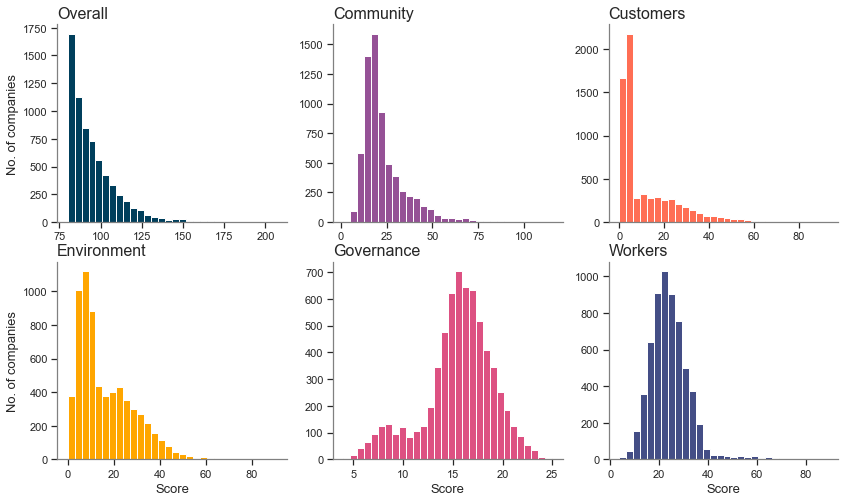

In [29]:
# score histogram subplots
plt.figure(figsize = (14,8))

plt.subplot(231)
plt.hist(bcorp_df.overall_score, bins = 30, color = "#003f5c", edgecolor = "white")
plt.title("Overall", loc = "left", fontsize = 16)
plt.ylabel("No. of companies", fontsize = 13)

plt.subplot(232)
plt.hist(bcorp_df.impact_area_community, bins = 30, color = "#955196", edgecolor = "white")
plt.title("Community", loc = "left", fontsize = 16)

plt.subplot(233)
plt.hist(bcorp_df.impact_area_customers, bins = 30, color = "#ff6e54", edgecolor = "white")
plt.title("Customers", loc = "left", fontsize = 16)

plt.subplot(234)
plt.hist(bcorp_df.impact_area_environment, bins = 30, color = "#ffa600", edgecolor = "white")
plt.title("Environment", loc = "left", fontsize = 16)
plt.xlabel("Score", fontsize = 13)
plt.ylabel("No. of companies", fontsize = 13)

plt.subplot(235)
plt.hist(bcorp_df.impact_area_governance, bins = 30, color = "#dd5182", edgecolor = "white")
plt.title("Governance", loc = "left", fontsize = 16)
plt.xlabel("Score", fontsize = 13)

plt.subplot(236)
plt.hist(bcorp_df.impact_area_workers, bins = 30, color = "#444e86", edgecolor = "white")
plt.title("Workers", loc = "left", fontsize = 16)
plt.xlabel("Score", fontsize = 13)

plt.show()

#### Median scores by impact area

In [30]:
bcorp_df[["overall_score","impact_area_community", "impact_area_customers", "impact_area_environment","impact_area_governance", "impact_area_workers"]].median()

overall_score              90.8
impact_area_community      19.5
impact_area_customers       4.4
impact_area_environment    11.8
impact_area_governance     15.8
impact_area_workers        23.3
dtype: float64

### Industry and score analysis focusing on impact areas

#### Sector vs industry category vs industry

sector > industry_category > industry

In [31]:
# count unique values in sector
bcorp_df["sector"].nunique()

6

In [32]:
# count unique values in industry_category
bcorp_df["industry_category"].nunique()

22

In [33]:
# count unique values in industry
bcorp_df["industry"].nunique()

161

There are more industries as of June 2023 compared to March 2023.

#### Median scores by impact area and industry category

In [34]:
# median overall score by industry category
industrycat_df = bcorp_df.groupby("industry_category").agg({"overall_score" : "median",
                                                            "impact_area_community" : "median",
                                                           "impact_area_customers" : "median",
                                                            "impact_area_environment" : "median",
                                                            "impact_area_governance" : "median",
                                                            "impact_area_workers": "median"})

In [35]:
industrycat_df.sort_values("overall_score", ascending = False)

,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers
industry_category,,,,,,
"Energy, Heating & Cooling",109.90,13.80,3.10,35.80,14.90,18.50
Water & Sewerage,101.10,17.90,29.60,24.20,12.90,17.60
Financial & insurance activities,96.20,16.50,25.70,6.40,16.80,26.80
Energy,94.80,15.35,2.70,35.15,14.75,21.35
Human health & social work,94.80,18.90,21.80,5.90,15.35,23.40
Education,94.20,16.85,24.80,5.05,15.75,23.70
Waste Management & Recycling,93.70,15.20,2.20,38.80,13.75,16.70
"Real estate, design & building",92.80,17.50,2.60,25.60,15.40,23.85
Professional & technical services,92.40,21.10,12.70,7.70,16.60,26.70


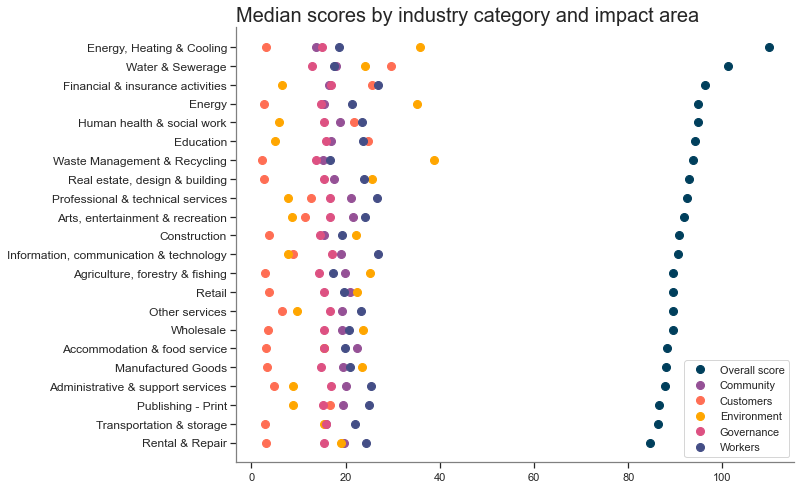

In [36]:
# plot median scores by industry category and impact area
plt.figure(figsize = (10,8))
industrycat_df = industrycat_df.sort_values("overall_score")

plt.plot(industrycat_df.overall_score, industrycat_df.index, "o", markersize = 8, color = "#003f5c", label = "Overall score")
plt.plot(industrycat_df.impact_area_community, industrycat_df.index, "o", markersize = 8, color = "#955196", label = "Community")
plt.plot(industrycat_df.impact_area_customers, industrycat_df.index, "o", markersize = 8, color = "#ff6e54", label = "Customers")
plt.plot(industrycat_df.impact_area_environment, industrycat_df.index, "o", markersize = 8, color = "#ffa600", label = "Environment")
plt.plot(industrycat_df.impact_area_governance, industrycat_df.index, "o", markersize = 8, color = "#dd5182", label = "Governance")
plt.plot(industrycat_df.impact_area_workers, industrycat_df.index, "o", markersize = 8, color = "#444e86", label = "Workers")

plt.yticks(fontsize = 12)
plt.legend()
plt.title("Median scores by industry category and impact area", loc = "left", fontsize = 20)
plt.show()

#### Median scores by industry and impact area

In [37]:
# create industry_df by industry, aggregate median impact scores
industry_df = bcorp_df.groupby("industry").agg({"overall_score" : "median",
                                                            "impact_area_community" : "median",
                                                           "impact_area_customers" : "median",
                                                            "impact_area_environment" : "median",
                                                            "impact_area_governance" : "median",
                                                            "impact_area_workers": "median"}).sort_values("overall_score", ascending = False)

In [38]:
industry_df.head(10)

,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers
industry,,,,,,
Wind power generation,154.90,60.40,4.1,46.60,11.80,11.60
Non-residential social work,116.00,26.35,24.6,8.75,15.20,26.15
Microfinance - Emerging Markets,115.80,14.90,48.5,4.20,18.30,25.30
Solar power generation,115.50,14.40,3.2,33.75,14.75,20.10
Pre- & primary education,112.35,18.20,33.1,7.75,14.25,20.45
Motorized vehicles,110.90,11.50,1.1,53.10,15.50,22.10
Steam & air conditioning,109.90,13.10,1.4,50.40,15.80,20.70
Other power generation,107.10,12.80,1.9,50.30,14.90,16.90
Wood & wood products,103.75,29.25,3.6,24.45,15.15,21.75


##### Top 10 industries by community impact score

In [39]:
# sort by impact_area_community
industry_community = industry_df[["impact_area_community"]].sort_values("impact_area_community", ascending = False).head(10)
industry_community

,impact_area_community
industry,
Wind power generation,60.40
Programming & broadcasting,38.00
Event catering & related,37.40
Games & toys,37.00
Financial markets exchanges,36.80
Beverage serving & bars,34.15
Mortgage advice & brokerage,32.60
"Libraries, museums & culture",32.30
Funeral & related services,32.20


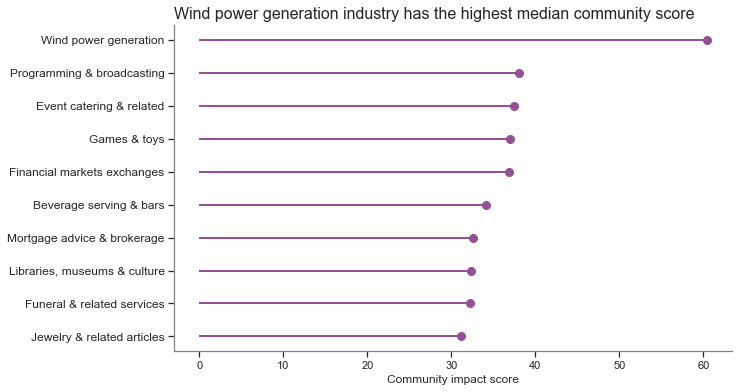

In [40]:
# plot top 10 industries by median community impact score
plt.figure(figsize = (10,6))

industry_community = industry_community.sort_values(by = "impact_area_community")

plt.hlines(y = industry_community.index, xmin = 0, xmax = industry_community.impact_area_community, linewidth = 2, color = "#955196")
plt.plot(industry_community.impact_area_community, industry_community.index, "o", markersize = 8, color = "#955196")

plt.title("Wind power generation industry has the highest median community score", loc = "left", fontsize = 16)
plt.xlabel("Community impact score", fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

##### Top 10 industries by environment impact score

In [41]:
# sort by impact_area_environment
industry_environment = industry_df[["impact_area_environment"]].sort_values("impact_area_environment", ascending = False).head(10)
industry_environment

,impact_area_environment
industry,
Motorized vehicles,53.10
Steam & air conditioning,50.40
Other power generation,50.30
Remediation & other waste management,47.05
Wind power generation,46.60
Other recycling,43.10
General second-hand goods,41.45
Forestry & logging,39.55
Materials recovery & recycling,38.80


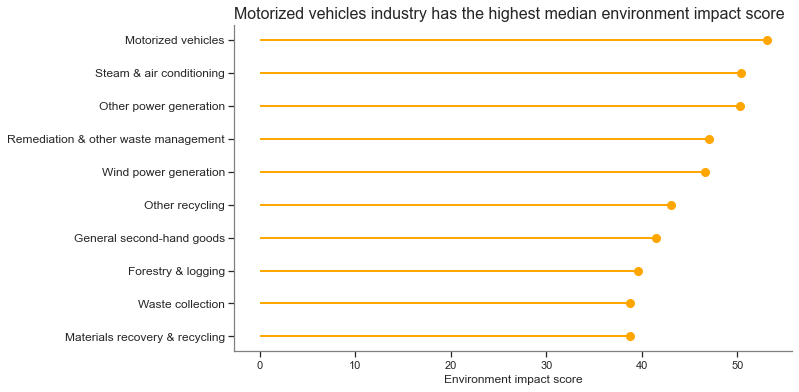

In [42]:
# plot top industries by median environment score
plt.figure(figsize = (10,6))

industry_environment = industry_environment.sort_values(by = "impact_area_environment")

plt.hlines(y = industry_environment.index, xmin = 0, xmax = industry_environment.impact_area_environment, linewidth = 2, color = "#ffa600")
plt.plot(industry_environment.impact_area_environment, industry_environment.index, "o", markersize = 8, color = "#ffa600")

plt.title("Motorized vehicles industry has the highest median environment impact score", loc = "left", fontsize = 16)
plt.xlabel("Environment impact score", fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

##### Top 10 industries by workers impact score

In [43]:
# sort by impact_area_workers
industry_workers = industry_df[["impact_area_workers"]].sort_values("impact_area_workers", ascending = False).head(10)
industry_workers

,impact_area_workers
industry,
Air transport,59.80
Repair: automotive,33.80
Book publishing,33.50
Programming & broadcasting,33.30
Securities brokerage,32.70
Other insurance services,31.75
Security & investigation,31.40
Non-life insurance,31.00
Financial markets exchanges,30.60


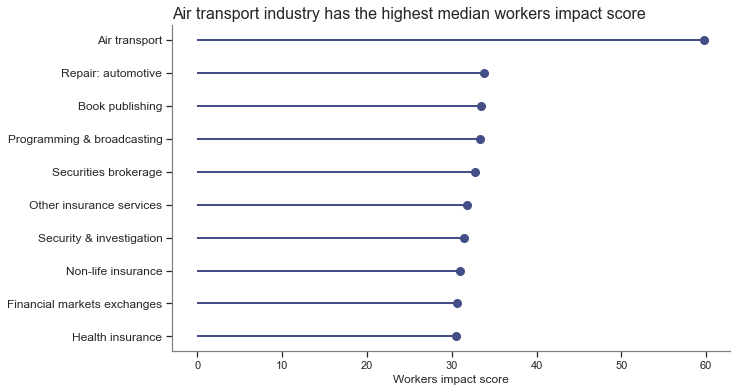

In [44]:
# plot top industries by median workers score
plt.figure(figsize = (10,6))

industry_workers = industry_workers.sort_values(by = "impact_area_workers")

plt.hlines(y = industry_workers.index, xmin = 0, xmax = industry_workers.impact_area_workers, linewidth = 2, color = "#444e86")
plt.plot(industry_workers.impact_area_workers, industry_workers.index, "o", markersize = 8, color = "#444e86")

plt.title("Air transport industry has the highest median workers impact score", loc = "left", fontsize = 16)
plt.xlabel("Workers impact score", fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

### What happened in 2023?

#### Create dataframe for companies first certified in 2023

In [45]:
# create data frame bcorp2023
bcorp2023 = bcorp_df.loc[bcorp_df.year_first_certified == "2023"]
bcorp2023.head()

,company_id,company_name,date_first_certified,date_last_certified,industry,industry_category,country,state,city,sector,size,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,impact_area_governance_na_score,impact_area_workers_na_score,year_first_certified,quarter_first_certified,company_count
0,0013b00001zWk0BAAS,PAD studio Ltd,2023-01-16,2023-01-16 13:07:41.005000+00:00,Architecture design & planning,"Real estate, design & building",United Kingdom,Hampshire,Lymington,Service with Minor Environmental Footprint,1-9,88.4,14.4,4.0,27.0,17.0,23.7,0.0,0.0,0.0,0.0,2.1,2023,2023Q1,1
24,0013b00001u8QB1AAM,OFELIA COMPANY SA,2023-05-10,2023-05-10 17:36:20.139000+00:00,Other personal services,Other services,Argentina,Buenos Aires,Ciudad de Buenos Aires,Service with Minor Environmental Footprint,0,83.3,43.2,6.8,4.4,19.9,NaN,5.9,0.0,2.9,0.0,NaN,2023,2023Q2,1
32,0013b00001vLgeNAAS,"Dr. Squatch, LLC",2023-04-10,2023-04-10 18:53:11.021000+00:00,Personal care products,Manufactured Goods,United States,California,Marina Del Rey,Manufacturing,50-249,80.5,17.5,4.4,21.6,13.3,22.8,0.7,0.0,0.0,0.0,0.0,2023,2023Q2,1
33,0013b00001qFAwrAAG,Satis Wealth Mangement (Satis Asset Management),2023-04-19,2023-04-19 10:12:37.450000+00:00,Investment advising,Financial & insurance activities,United Kingdom,City of London,London,Service with Minor Environmental Footprint,10-49,109.6,16.8,27.5,8.0,19.7,33.6,0.8,0.0,0.0,0.0,3.0,2023,2023Q2,1
36,0013b00001vPVrlAAG,SAMM TRADING,2023-02-22,2023-02-22 09:04:56.310000+00:00,Management consultant - for-profits,Professional & technical services,France,Grand Est,CORMONTREUIL,Service with Minor Environmental Footprint,1-9,83.5,14.3,3.5,10.3,19.2,27.8,2.2,0.0,0.8,0.0,5.0,2023,2023Q1,1


In [46]:
# check number of rows
bcorp2023.shape

(916, 25)

916 companies became Certfied B Corporation in 2023 so far.

#### Number of companies

##### Which countries have the most the newly certified B Corp companies in 2023?

In [47]:
# create data frame country2023
country2023 = bcorp2023[["country","company_count"]].groupby("country").count().sort_values("company_count", ascending = False).head(20)

In [48]:
country2023

,company_count
country,
United Kingdom,294
United States,180
Canada,65
Netherlands The,43
Italy,42
Australia,40
France,37
Brazil,26
Spain,18


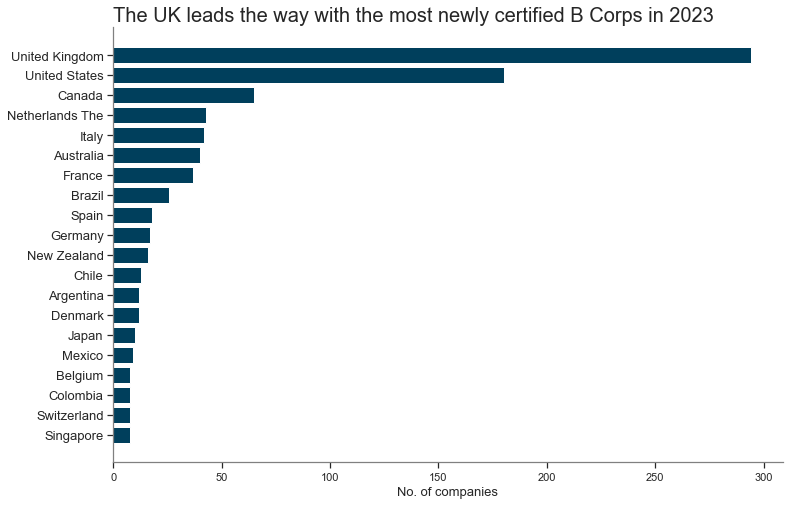

In [49]:
# horizontal bar plot top 20 countries by number of companies newly certified in 2023
plt.figure(figsize = (12,8))

country2023 = country2023.sort_values(by = "company_count")

plt.barh(country2023.index, country2023.company_count, color = "#003f5c")
plt.title("The UK leads the way with the most newly certified B Corps in 2023", loc = "left", fontsize = 20)
plt.xlabel("No. of companies", fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

##### In which cities are the most newly certified B Corps located?

In [50]:
# create data frame city2023
city2023 = bcorp2023[["city", "company_count"]].groupby(["city"]).sum().sort_values("company_count",ascending = False).head(20)

In [51]:
city2023

,company_count
city,
London,101
Bristol,17
Amsterdam,17
Paris,14
São Paulo,11
Vancouver,10
Portland,9
Manchester,8
Singapore,8


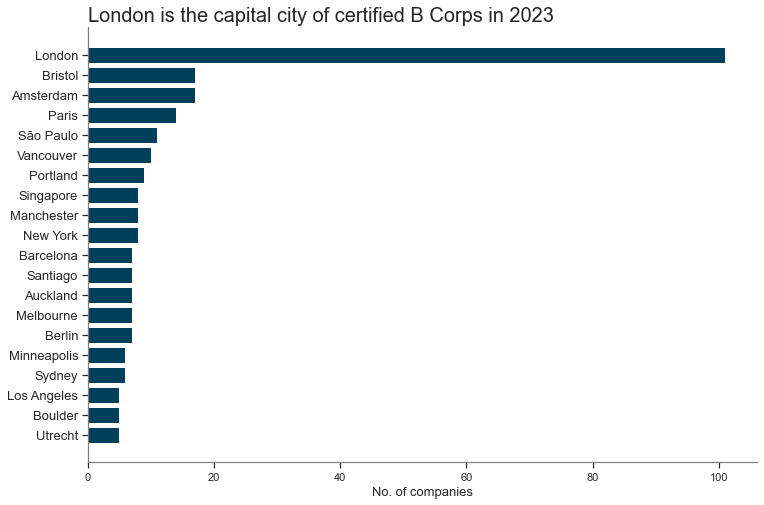

In [52]:
# top 20 cities by newly certified B Corps in 2023
plt.figure(figsize = (12,8))

city2023 = city2023.sort_values(by = "company_count")

plt.barh(city2023.index, city2023.company_count, color = "#003f5c")

plt.title("London is the capital city of certified B Corps in 2023", loc = "left", fontsize = 20)
plt.xlabel("No. of companies", fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

##### Number of newly certified B Corps by size

In [53]:
# create data frame size2023
size2023 = bcorp2023.groupby("size").agg({"company_count":"sum"})

# define order by size increasing
order = ["0","1-9","10-49","50-249","250-999","1000+"]

# custom order index
size2023 = size2023.reindex(order)

In [54]:
size2023

,company_count
size,
0,71
1-9,243
10-49,368
50-249,173
250-999,50
1000+,11


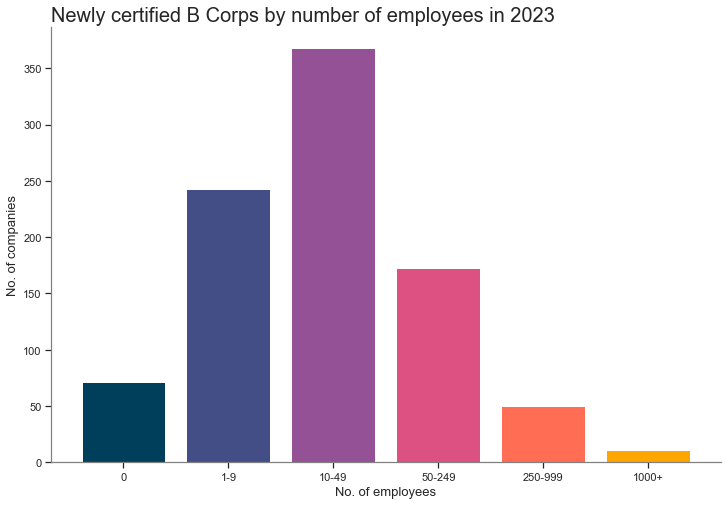

In [55]:
# bar plot companies certified in 2023 by size
plt.figure(figsize = (12,8))

plt.bar(size2023.index, size2023.company_count, color = ["#003f5c", "#444e86","#955196", "#dd5182","#ff6e54","#ffa600"])

plt.title("Newly certified B Corps by number of employees in 2023", loc = "left", fontsize = 20)
plt.xlabel("No. of employees", fontsize = 13)
plt.ylabel("No. of companies", fontsize = 13)

plt.show()

#### Which newly certified companies have the highest overall score?

In [56]:
bcorp2023[["company_name", "country","industry", "overall_score"]].sort_values("overall_score", ascending = False).head(10)

,company_name,country,industry,overall_score
653,The Good Agency Group Limited,United Kingdom,Advertising & market research,154.7
682,SEED - Sustainable Entrepreneurial Ecosystem D...,United States,Other manufacturing,151.9
338,WELIGHT MADAGASCAR,Madagascar,Solar panel installation,148.5
5270,Includability - The Home of Inclusive Organisa...,United Kingdom,Employment placement & HR,143.2
3127,Medsalv,New Zealand,Medical & dental supplies,139.4
3841,NM2 - Tecnologia Ambiental Inovadora,Brazil,Water supply & treatment,137.0
1038,Kinectid,United Kingdom,Other renewable energy installation,135.5
4203,Brave Technology Coop,Canada,Mobile applications,135.1
4029,Arjuna Capital,United States,Investment advising,131.9
4365,E.I ES IM-PERFECT FOOD S.L.,Spain,Agricultural Processing,130.4


### First certification time series

#### How many companies got certified each year?

In [57]:
# number of companies by year first certified
firstcert_df = bcorp_df[["year_first_certified", "company_count"]].groupby(["year_first_certified"]).sum()

In [58]:
firstcert_df

,company_count
year_first_certified,
2007,23
2008,20
2009,11
2010,31
2011,50
2012,76
2013,106
2014,169
2015,233


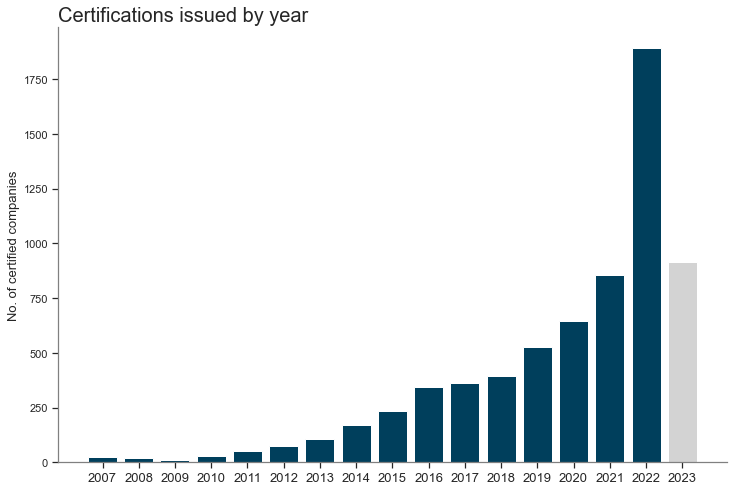

In [59]:
# first certified year bar plot with 2023 colored in grey as it's Q1 & Q2 only
plt.figure(figsize = (12,8))

years = firstcert_df.index
counts = firstcert_df.company_count
colors = ["lightgrey" if i == "2023" else "#003f5c" for i in years]

plt.bar(years, counts, color = colors)
plt.title("Certifications issued by year", loc = "left", fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 13)
plt.ylabel("No. of certified companies", fontsize = 13)
plt.show()

#### How many companies got certified on a quarterly basis in the past few years?

In [60]:
# create data frame for quarters after 2019
quarter_firstcert = bcorp_df.loc[bcorp_df.quarter_first_certified >= "2019Q1"].groupby(["quarter_first_certified"]).agg({"company_count": "sum"})

In [61]:
quarter_firstcert

,company_count
quarter_first_certified,
2019Q1,94
2019Q2,140
2019Q3,148
2019Q4,146
2020Q1,101
2020Q2,151
2020Q3,189
2020Q4,204
2021Q1,209


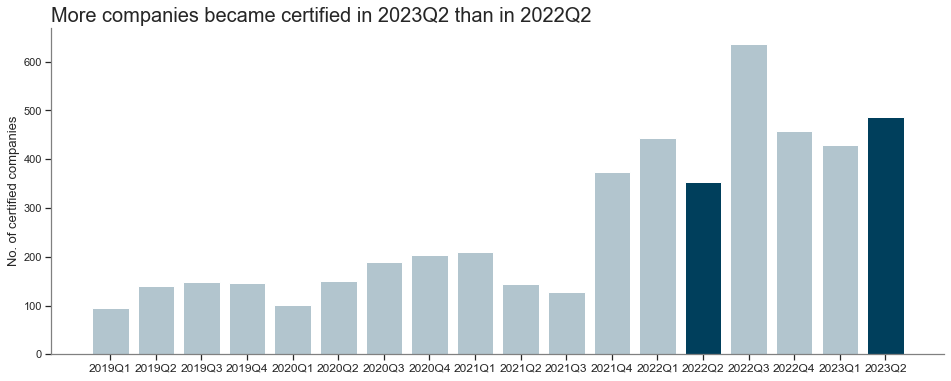

In [62]:
# first certified quarter bar plot
plt.figure(figsize = (16,6))

quarters = quarter_firstcert.index
qcounts = quarter_firstcert.company_count
qcolors = ["#003f5c" if q == "2022Q2" or q == "2023Q2" else "#b2c5ce" for q in quarters]

plt.bar(quarters, qcounts, color = qcolors)
# plt.bar(quarter_firstcert.index, quarter_firstcert.company_count, color = "#003f5c")
plt.title("More companies became certified in 2023Q2 than in 2022Q2", loc = "left", fontsize = 20)
plt.xlabel("")
plt.xticks(fontsize = 12)
plt.ylabel("No. of certified companies", fontsize = 13)
plt.show()

### Observations

- There are more industries as of June 2023 compared to March 2023.
- Industry categories with the highest overall score don't necessarily have high median scores in other impact areas.
- Wind power generation industry has the highest median community score.
- Motorized vehicles industry has the highest median environment impact score.
- Air transport industry has the highest median workers impact score.
- 916 companies became Certified B Corps in 2023 so far, 294 of them are located the UK, 101 in London.
- More than half of the newly certified B Corps have a size of under 50 employees.
- The Good Agency Group Limited, an advertising & market research company has the highest overall score among the newly certfied B Corps.
- 486 companies got certified in 2023Q2, 38% more than in 2022Q2 (353).

### Visualizations created

- Score histogram subplots by impact area
- Median scores by industry category and impact area (dot plot)
- Top 10 industries by median community impact score (lollipop chart)
- Top 10 industries by median environment impact score (lollipop chart)
- Top 10 industries by median workers impact score (lollipop chart)
- Number of companies certified in 2023 by country (horizontal bar chart)
- Number of companies certified in 2023 by city (horizontal bar chart)
- Newly certified B Corps by size (bar chart)
- Certfications issued by year (bar chart, 2023 colored differently)
- Certfications issued by quarter (bar chart, 2022Q2 and 2023Q2 highlighted)

## Variables in this notebook

In [63]:
%whos

Variable               Type         Data/Info
---------------------------------------------
bcorp2023              DataFrame                  company_id <...>\n[916 rows x 25 columns]
bcorp_df               DataFrame                  company_id <...>n[6655 rows x 25 columns]
city2023               DataFrame                 company_coun<...>ondon                 101
colors                 list         n=17
country2023            DataFrame                     company_<...>d Kingdom             294
counts                 Series       year_first_certified\n200<...>mpany_count, dtype: int64
custom_params          dict         n=3
date                   type         <class 'datetime.date'>
datetime               type         <class 'datetime.datetime'>
firstcert_df           DataFrame                          com<...>                      916
industry_community     DataFrame                             <...>                    60.40
industry_df            DataFrame                           

## References

- B Corp website: https://www.bcorporation.net/en-us
- B Corp certification https://www.bcorporation.net/en-us/certification
- The original dataset by B Lab on *data.world*: https://data.world/blab/b-corp-impact-data
- The original data dictionary: https://data.world/blab/b-corp-impact-data/workspace/data-dictionary
- B Lab SQL query tutorial for *data.world*: https://kb.bimpactassessment.net/support/solutions/articles/43000570530-using-sql-in-b-corp-impact-data-tutorial-
- B Corp Project Description and Notes: https://github.com/zhaw-education/student-repo-2023r1-annamandoki/blob/main/project/B_Corp_Project_Description_Notes.md